In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import svm
from sklearn.model_selection import train_test_split
%matplotlib inline

train = pd.read_csv('train.csv').values
test = pd.read_csv('test.csv').values

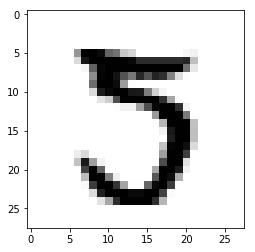

In [2]:
images = train[:10000,1:]
labels = train[:10000,0]
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, train_size=.8)

def view(i):
    plt.imshow(256 - train[i, 1:].reshape((28, 28)), 'gray')
view(21600)

In [3]:
clf = svm.SVC()
clf.fit(train_images, train_labels)
clf.score(test_images, test_labels)

0.10150000000000001

In [4]:
test_images[test_images > 0] = 1
train_images[train_images > 0] = 1
clf.fit(train_images, train_labels)
clf.score(test_images, test_labels)

0.92800000000000005

In [5]:
test[test > 0] = 1
pd.DataFrame({'imageid': np.arange(1, 28001), 'label': clf.predict(test)}).to_csv('sub.csv', index=False)